In [16]:
import re
import json
import time
import requests

import pandas as pd
import seaborn as sns

from bs4 import BeautifulSoup
from matplotlib import pyplot as plt

## Part I: Working with HTML and JSON

#### Reading data from the JSON file

In [2]:
json_data = pd.read_json("https://raw.githubusercontent.com/ktxdev/AIM-5001/main/M9/1.%20Data/albums.json")
json_data

,title,artist,year,tracks
0,And Then,Christopher Martin,2019,"[Life, Come Back, Bun Fi Bun, Can't Dweet Agai..."
1,Mustard Seed,Nutty O,2021,"[Open Doors, Safe, Ndiwe, Peter Pan, Ready, Ku..."
2,Melody,Demarco,2021,"[My Way, Do It Again, For You, In My Heart, St..."


#### Reading data from the HTML file

In [3]:
# Get first table in list returned
html_data = pd.read_html("https://raw.githubusercontent.com/ktxdev/AIM-5001/main/M9/1.%20Data/albums.html")[0]
html_data

,Title,Artist,Year,Tracks
0,And Then,Christopher Martin,2019,Life Come Back Bun Fi Bun Can't Dweet Again...
1,Mustard Seed,Nutty O,2021,Open Doors Safe Ndiwe Ready Kungfu Peter Pan
2,Melody,Demarco,2021,My Way Do It Again For You In My Heart Stu...


In [4]:
print("Tracks Type (json_data): ", type(json_data['tracks'][0]))
print("Tracks Type (html_data): ", type(html_data['Tracks'][0]))

Tracks Type (json_data):  <class 'list'>
Tracks Type (html_data):  <class 'str'>


The two dataframes above have one column "tracks" that has differences, indicating that they are not truly the same. The data in the "tracks" column of `json_data` has a `Series` object that encompasses a `list` object, while the data in the "tracks" column of `html_data` also contains a `Series` object but the object encompasses a `str` object.

## Part II: Scraping the Katz School’s “Staff” Web Page

In [5]:
# Get the staff page
page = requests.get("https://www.yu.edu/katz/staff")
# Parse staff page content
soup = BeautifulSoup(page.content, 'html.parser')

# Find the div that contains all the staff information
staff = soup.find('div', class_="text-only")

# Creating a dataframe for staff information
staff_info = pd.DataFrame(columns = ["name", "title", "office", "email", "phone"])

# Current cursor position
current = staff.find('div').find('h3')
current_office = None

# Loop over all staff information
while current:
    if current.name == 'h3':
        current_office = current.contents[0].strip() # Get office name

    elif current.name == 'p' and current.contents[0].strip() != "": 
        # Get contents of the p tag
        contents = current.contents
        
        # Create dict for the staff member
        staff_member = { "name": contents[0].split(",")[0], "office": current_office, "email": "N/A", "phone": "N/A" }
        
        # Set current member's title
        if current.find('span'):
            staff_member["title"] = current.find('span').contents[0].strip()
        else:
            staff_member["title"] = contents[0].split(",")[1].strip()
        
        # Set current member's email if it exists
        mail = current.find('a')
        if mail.get("href").startswith("mailto"):
            staff_member["email"] = mail.contents[0]
            
        # Extract current member's phone number using regex
        phone = re.findall(r"[0-9-. ]{10,}", current.text)

        # Set current member's phone number if it exists
        if phone:
            staff_member["phone"] = phone[0]
        
        # Add member infomation to the dataframe
        staff_info = pd.concat([staff_info, pd.DataFrame([staff_member])], ignore_index = True)
    
    # Move cursor to next html tag
    current = current.find_next_sibling()


staff_info

,name,title,office,email,phone
0,Paul Russo,Vice Provost and Dean,Office of the Dean,N/A,N/A
1,Aaron Ross,Assistant Dean for Academic Programs and Deput...,Office of the Dean,aaron.ross2@yu.edu,646-592-4148
2,Jackie Hamilton,Executive Director of Enrollment Management an...,Office of the Dean,jackie.hamilton@yu.edu,646-787-6194
3,Pamela Rodman,Director of Finance and Administration,Office of the Dean,pamela.rodman@yu.edu,646.592.4777
4,Tabitha Collazo,Business and Operations Coordinator,Office of the Dean,tabitha.collazo@yu.edu,646-592-4735
5,Ann Leary,Office Manager/Executive Assistant to the Dean...,Office of the Dean,ann.leary@yu.edu,646-592-4724
6,Jared Hakimi,Director,Graduate Admissions,jared.hakimi@yu.edu,646-592-4722
7,Xavier Velasquez,Associate Director of Graduate Admissions Oper...,Graduate Admissions,xavier.velasquez@yu.edu,646-592-4737
8,Shayna Matzner,Assistant Director,Graduate Admissions,shayna.matzner@yu.edu,646-592-4726
9,Linyu Zheng,Assistant Director,Graduate Admissions,linyu.zheng@yu.edu,1-332-271-5865


The data in the `staff_info` dataframe appropriately represent the information on Yeshiva University's staff page.

## Part III: Working with Web API’s

In [24]:
base_url = "https://newsdata.io/api/1/news?apikey=pub_4046009183297c1193f8a39cd7e388da89a99&q=tech"
res = requests.get(base_url)

# Load API response as JSON
json_data = json.loads(res.text)

# Create dataframe for the data
data_columns = ["title", "category", "language", "creator", "keywords", "pubDate"]
data = pd.DataFrame(json_data["results"], columns = data_columns)

# Loops five times to get more news from API
for i in range(5):
    time.sleep(1) # Delay execution to avoid rate limit exception
    
    res = requests.get(f"{base_url}&page={json_data['nextPage']}")
    json_data = json.loads(res.text)
    
    new_data = pd.DataFrame(json_data["results"], columns = data_columns)
    data = pd.concat([data, new_data], ignore_index = True)


data.head(10)

,title,category,language,creator,keywords,pubDate
0,El viacrucis de la Sagrada Familia llegará a s...,[top],spanish,[Editor Web],"[pereira, colegio la sagrada familia, p1, sema...",2024-03-24 12:56:58
1,Tesla Model 3 Performance Enters Spotlight wit...,[top],english,[Ethan Moreno],[electric vehicle],2024-03-24 12:54:17
2,El pálido rostro del Hospital del Niño de Breñ...,[top],spanish,[Redacción Diario Correo],None,2024-03-24 12:54:03
3,Fluence’s ‘Cloudless Platform’ Goes Live as Al...,[top],english,[Paul Godwin],[community insights],2024-03-24 12:52:13
4,S&P 500 Giants Lead Charge,[top],english,[Paul Godwin],[latest insights | news],2024-03-24 12:48:05
5,Renault Mart 2024 kampanyası için son 8 gün! İ...,[business],turkish,None,None,2024-03-24 12:48:02
6,Misinformation spread via deepfakes biggest th...,[top],english,[The Hans India],"[technology,tech news]",2024-03-24 12:45:44
7,Gurman: iOS 18 to feature new home screen that...,[top],english,[Benjamin Mayo],[general],2024-03-24 12:45:03
8,Pershing Square Holdings 2023 Letter To Shareh...,[business],english,None,"[goog, googl, low, umgnf, cmg, qsr, hlt, hhh, ...",2024-03-24 12:45:00
9,How Nvidia’s Blackwell is a revolutionary tech...,[politics],english,[Firstpost],[opinion],2024-03-24 12:39:35


### Creating subset of original data

In [25]:
# Slicing columns to extract attributes for analysis
data2  = data[["category", "language"]]
data2.head()

,category,language
0,[top],spanish
1,[top],english
2,[top],spanish
3,[top],english
4,[top],english


### Converting category column to string objects

In [29]:
# Creating a copy of data2
data3 = data2.copy()
data3["category"] = data3["category"].apply(lambda cat: '+'.join(cat))

### Checking for nulls

In [27]:
data3.columns[data3.isnull().any()]

Index([], dtype='object')

**Discussion of results:** According to the analysis above, the dataset does not contains null or missing values.

### Descriptive statistics
#### Category

In [31]:
print(data3['category'].value_counts())
print(data3['category'].value_counts() / len(data3))

category
top              29
technology       16
business          7
politics          3
other             3
entertainment     1
health            1
Name: count, dtype: int64
category
top              0.483333
technology       0.266667
business         0.116667
politics         0.050000
other            0.050000
entertainment    0.016667
health           0.016667
Name: count, dtype: float64


**Discussion of results:** According to the data, approximately 48.33% are top news, 26.67% are technology news, 11.67% are business news, and the remaining categories (politics, entertainment, health, and others) account for 13.33%. 

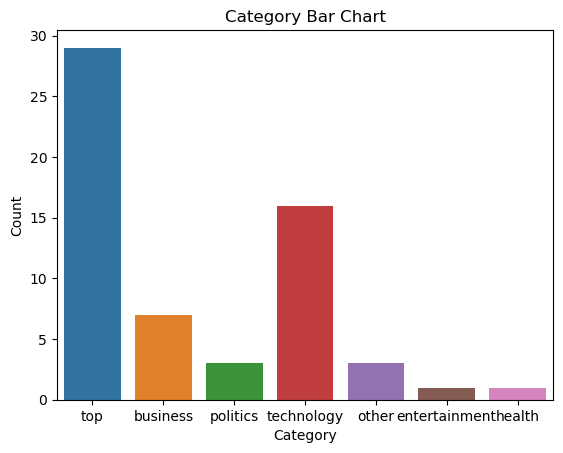

In [33]:
# Seaborn graph of Category
sns.countplot(x = 'category', data = data3)

# give the plot a title
plt.title('Category Bar Chart')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

**Discussion of Result:** According to the counts for each group, this bar chart simply shows that top news appears the most frequently in the dataset, followed by technology and then business.

#### Language

In [13]:
print(data2['language'].value_counts())
print(data2['language'].value_counts() / len(data2))

language
english       47
spanish        4
telugu         2
indonesian     2
hungarian      1
italian        1
german         1
french         1
thai           1
Name: count, dtype: int64
language
english       0.783333
spanish       0.066667
telugu        0.033333
indonesian    0.033333
hungarian     0.016667
italian       0.016667
german        0.016667
french        0.016667
thai          0.016667
Name: count, dtype: float64


**Discussion of results:** According to the data, the majority of news stories are written in English, accounting for 78.33%, with the remaining amount distributed among the other languages.

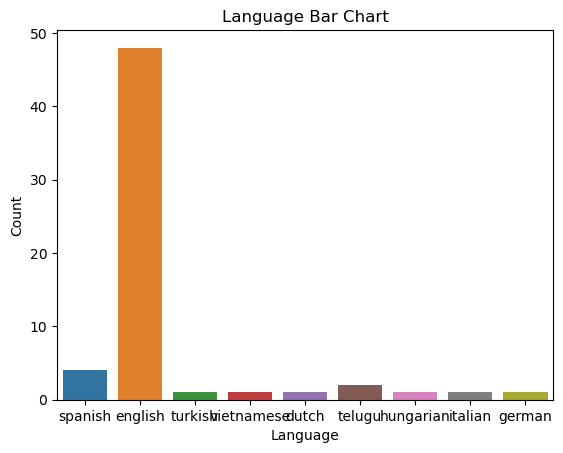

In [35]:
# Seaborn graph of Category
sns.countplot(x = 'language', data = data3)

# give the plot a title
plt.title('Language Bar Chart')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

**Discussion of Results:** Based on the numbers for each group, this bar chart simply demonstrates that English news category occurs the most frequently.